# Benchmarking binding classification with XGBoost 


----

- Cross validation using the train data and evaluation on 'blind test set'.

- Using all observations (all species, </=/> values too)

- simple one-hot encoding scheme for all categorical variables (species, hla type/subtypes,sequence)

- This is the best i can do now


----

In [1]:
import os,sys

#my functions
sys.path.append('../')
from utils import load_data,my_xgb_cv_predict,my_xgb_fit_predict,plot_roc

#go to working dir
work_dir='/data/data1/ribli/mhc/'
os.chdir(work_dir)

%matplotlib inline

Using Theano backend.


### Load train and test data

In [2]:
X_train,y_train,y_train_c,X_test,y_test,y_test_c,=load_data(
    hla_representation='one-hot',
    species_representation='one-hot',
    seq_representation='one-hot')

Reading from file...
Creating representation...
Using  137654  training data points
Using  27680  testing data points
Done, It took: 8.33401703835 s


----


### Cross Validate on training data


In [4]:
#model params
params = {'max_depth':20,
         'eta':0.1,
         'min_child_weight':5,
         'colsample_bytree':1,
         'subsample':1,
         'silent':1,
         'objective': "binary:logistic",
         'eval_metric': 'auc',
         'nthread':8}

y_pred=my_xgb_cv_predict(params,X_train,y_train_c,n_folds=5)

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.840393	eval-auc:0.815768
[500]	train-auc:0.991135	eval-auc:0.927160
[1000]	train-auc:0.997097	eval-auc:0.928704
Stopping. Best iteration:
[1150]	train-auc:0.997864	eval-auc:0.928957

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.830116	eval-auc:0.813824
[500]	train-auc:0.990892	eval-auc:0.939302
[1000]	train-auc:0.997058	eval-auc:0.940321
Stopping. Best iteration:
[965]	train-auc:0.996851	eval-auc:0.940409

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.829768	eval-auc:0.804139
[500]	train-auc:0.990826	eval-auc:0.928325
[1000]	train-auc:0.997094	eval-auc:0.930252
Stopping. Best iteration:
[1034]	train-auc:0.997297	eval-auc:0.930331

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.833450	eval-auc:0.810133
[500]	train-auc:0.990867	eval-auc:0.930308
[1000]	train-auc:0.997040	eval-auc:0.932515
Stopping. Best iteration:
[1224]	tra

----
### Evaluate


AUC: 0.931961595053


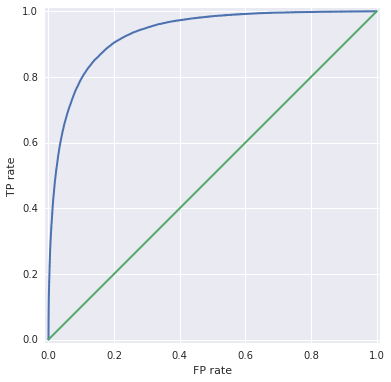

In [5]:
plot_roc(y_train_c,y_pred)

----
### Predict blind data

In [7]:
y_test_pred=my_xgb_fit_predict(params,X_train,y_train_c,X_test,
                       num_boost_round=5000,verbose_eval=500,
                       early_stopping_rounds=200,
                       validation_size=0.1)

Will train until eval error hasn't decreased in 200 rounds.
[0]	train-auc:0.837405	eval-auc:0.818899
[500]	train-auc:0.989835	eval-auc:0.936481
[1000]	train-auc:0.996160	eval-auc:0.937789
Stopping. Best iteration:
[812]	train-auc:0.994606	eval-auc:0.937893



AUC: 0.909114445544


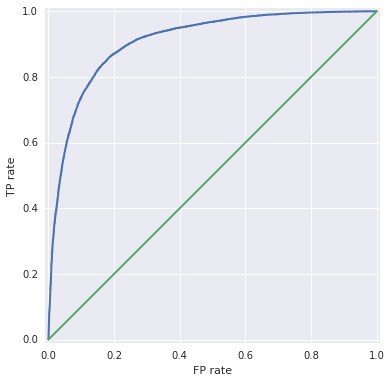

In [8]:
plot_roc(y_test_c,y_test_pred)

---

## Conclusion: passed 'state of the art'

Method | CV | Blind test
--- | --- | ---
SMMPMBEC | 0.8989 | 0.8474
NetMHC | 0.8930 | 0.8833
NetMHCpan |0.9176 | 0.8830
xgboost |**0.9320** | **0.9092**


---
